In [37]:
import pandas
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
import statsmodels
from statsmodels.formula.api import ols
%matplotlib inline

In [38]:
cd "F:\Data"

F:\Data


In [39]:
turnstile_weather = pandas.read_csv("turnstile_data_master_with_weather.csv")

In [40]:
turnstile_weather.columns.values

array(['Unnamed: 0', 'UNIT', 'DATEn', 'TIMEn', 'Hour', 'DESCn',
       'ENTRIESn_hourly', 'EXITSn_hourly', 'maxpressurei', 'maxdewpti',
       'mindewpti', 'minpressurei', 'meandewpti', 'meanpressurei', 'fog',
       'rain', 'meanwindspdi', 'mintempi', 'meantempi', 'maxtempi',
       'precipi', 'thunder'], dtype=object)

In [41]:
with_rain = turnstile_weather[turnstile_weather['rain'] == 1]
with_rain_mean = np.mean(with_rain['ENTRIESn_hourly'])
without_rain = turnstile_weather[turnstile_weather['rain'] == 0]
without_rain_mean = np.mean(without_rain['ENTRIESn_hourly'])
MW = scipy.stats.mannwhitneyu(with_rain['ENTRIESn_hourly'], without_rain['ENTRIESn_hourly'])

In [42]:
MW

(1924409167.0, 0.019309634413792565)

In [43]:
y = turnstile_weather['ENTRIESn_hourly']
x = turnstile_weather[['rain', 'precipi', 'meantempi', 'meandewpti']]
dummy_units = pandas.get_dummies(turnstile_weather['UNIT'], prefix='unit')
dummy_units2 = pandas.get_dummies(turnstile_weather['Hour'], prefix='unit')
features = x.join(dummy_units).join(dummy_units2)
model = sm.OLS(y,features)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     269.3
Date:                Sat, 27 Jun 2015   Prob (F-statistic):               0.00
Time:                        11:04:35   Log-Likelihood:            -1.1648e+06
No. Observations:              131951   AIC:                         2.331e+06
Df Residuals:                  131459   BIC:                         2.335e+06
Df Model:                         491                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
rain          -0.0685     13.941     -0.005      0.996       -27.393    27.256
precipi       38.7883     13.036      2.975      0.003        13.237    64.339
meantempi     -6.1059      1.096     -5.569      0.000        -8.255    -3.957
meandewpti    -1.5736      0.773     -2.036      0.042        -3.088    -0.059
unit_R001   2702.1642    121.505     22.239      0.000      2464.017  2940.312
unit_R002   -366.3333    122.523     -2.990      0.003      -606.477  -126.189
unit_R003  -1448.7471    126.228    -11.477      0.000     -1696.152 -1201.342
unit_R004  -1118.7324    124.810     -8.964      0.000     -1363.357  -874.108
unit_R005  -1132.5171    125.163     -9.048      0.000     -1377.835  -887.199
unit_R006   -977.7235    120.128     -8.139      0.000     -1213.172  -742.275
unit_R007  -1300.5006    126.966    -10.243      0.000     -1549.352 -1051.650
unit_R008  -1285.8013    129.290     -9.945      0.000     -1539.208 -1032.395
unit_R009  -1303.4160    126.256    -10.324      0.000     -1550.875 -1055.957
unit_R010   3493.6119    123.483     28.292      0.000      3251.587  3735.637
unit_R011   6485.3076    117.985     54.967      0.000      6254.058  6716.557
unit_R012   5921.2965    114.539     51.697      0.000      5696.801  6145.792
unit_R013    920.5882    119.502      7.704      0.000       686.367  1154.809
unit_R014   2753.8023    120.232     22.904      0.000      2518.151  2989.454
unit_R015   1109.0001    110.287     10.056      0.000       892.840  1325.160
unit_R016   -615.9599    120.776     -5.100      0.000      -852.679  -379.240
unit_R017   2641.5207    120.461     21.928      0.000      2405.420  2877.622
unit_R018   4492.0245    108.933     41.236      0.000      4278.517  4705.532
unit_R019   1343.3861    117.099     11.472      0.000      1113.874  1572.898
unit_R020   4971.6688    115.083     43.201      0.000      4746.109  5197.229
unit_R021   2892.4244    115.394     25.066      0.000      2666.255  3118.594
unit_R022   7096.0483    114.806     61.809      0.000      6871.030  7321.066
unit_R023   4977.3941    118.902     41.861      0.000      4744.349  5210.439
unit_R024   1444.3534    120.446     11.992      0.000      1208.281  1680.425
unit_R025   3467.5892    115.664     29.980      0.000      3240.889  3694.289
unit_R027   1400.5841    118.268     11.842      0.000      1168.781  1632.387
unit_R028   1291.6253    116.915     11.048      0.000      1062.474  1520.776
unit_R029   5040.1154    118.292     42.607      0.000      4808.265  5271.966
unit_R030   1271.4428    117.968     10.778      0.000      1040.228  1502.658
unit_R031   2986.1439    118.913     25.112      0.000      2753.077  3219.211
unit_R032   2572.6530    119.830     21.469      0.000      2337.788  2807.518
unit_R033   6888.7100    116.530     59.115      0.000      6660.314  7117.106
un

In [44]:
features_array = x.values
intercept = results.params[0]
params = results.params[0:4]
predictions = intercept + np.dot(features_array, params)

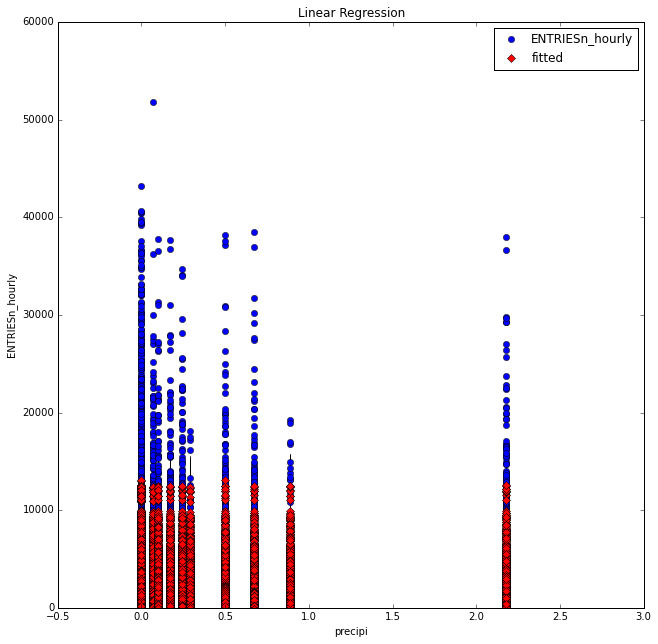

In [45]:
fig, ax = plt.subplots()
statsmodels.graphics.regressionplots.plot_fit(results, 'precipi', ax=ax)
ax.set_ylabel("ENTRIESn_hourly")
ax.set_xlabel("precipi")
ax.set_title("Linear Regression")
plt.axis([-.5, 3, 0, 60000])
fig1 = matplotlib.pyplot.gcf()
fig1.set_size_inches(10.5,10.5)
plt.show()

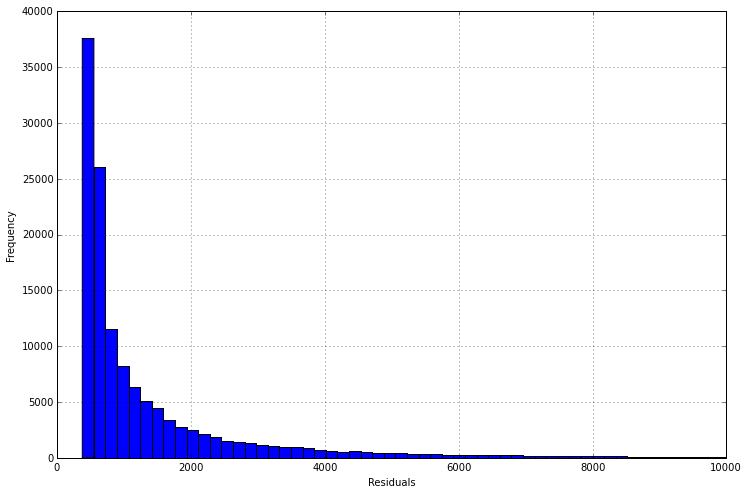

In [46]:
df = turnstile_weather
fig, ax = plt.subplots()
ax.set_xlabel("Residuals")
ax.set_ylabel("Frequency")
plt.axis([0, 10000, 0, 40000])
(df['ENTRIESn_hourly'] - predictions).hist(bins = 300)
fig.set_size_inches(12,8)
plt.show()

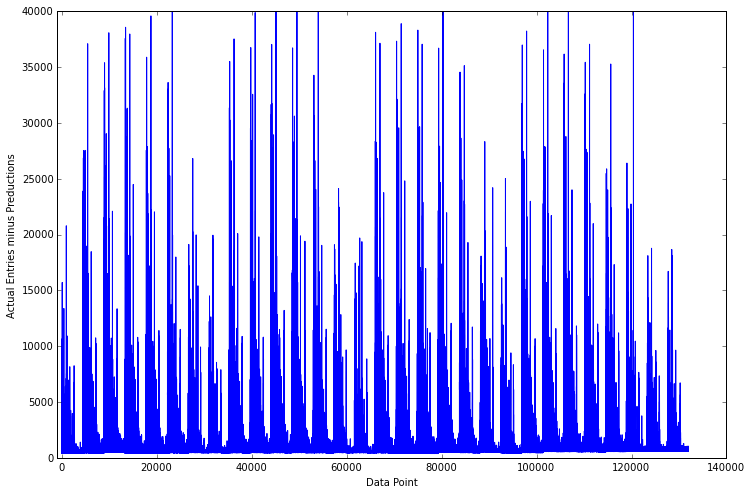

In [48]:
fig2, ax2 = plt.subplots()
ax2.set_ylabel("Actual Entries minus Preductions")
ax2.set_xlabel("Data Point")
plt.axis([-1000, 140000, -0, 40000])
plt.plot(turnstile_weather['ENTRIESn_hourly'] - predictions)
fig2.set_size_inches(12,8)
plt.show()